In [7]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/39.5 MB 2.8 MB/s eta 0:00:14
   -- ------------------------------------- 2.1/39.5 MB 4.2 MB/s eta 0:00:09
   -- ------------------------------------- 2.4/39.5 MB 3.4 MB/s eta 0:00:12
   -- ------------------------------------- 2.6/39.5 MB 3.1 MB/s eta 0:00:12
   --- ------------------------------------ 3.7/39.5 MB 3.1 MB/s eta 0:00:12
   ---- ----------------------------------- 4.5/39.5 MB 3.1 MB/s eta 0:00:12
   ----- ---------------------------------- 5.0/39.5 MB 3.0 MB/s eta 0:00:12
   ----- ---------------------------------- 5.5/39.5 MB 2.9 MB/s eta 0:00:12
   ----- ---------------------------------- 5.8/39.5 MB 2.7 MB/s eta 0:00:13
   ------ --------------------------------- 6.0/39.5 MB 2.6 MB/s eta 0:00:13
   ------ ----------

In [1]:
!pip install albumentations

  Using cached albumentations-2.0.7-py3-none-any.whl.metadata (43 kB)
  Using cached pydantic-2.11.4-py3-none-any.whl.metadata (66 kB)
  Using cached albucore-0.0.24-py3-none-any.whl.metadata (5.3 kB)
  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
Using cached albumentations-2.0.7-py3-none-any.whl (367 kB)
Using cached albucore-0.0.24-py3-none-any.whl (15 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl (39.4 MB)
Using cached pydantic-2.11.4-py3-none-any.whl (443 kB)
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)

   ---------------------------------------- 0/5 [opencv-python-headless]
   ---------------------------------------- 0/5 [opencv-python-headless]
   ---------------------------------------- 0/5 [opencv-python-headless]
   ---------------------------------------- 0/5 [opencv-python-headless]
   ----------------------------------

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
import cv2
from scipy import ndimage
import albumentations as A
import random
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Load a sample dataset - we'll use both a tabular dataset and an image dataset
# For tabular data, let's use the Titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# Basic Exploration
print(f"Dataset shape: {df.shape}")
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (891, 12)

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)

# ----- FEATURE ENGINEERING FOR TABULAR DATA -----

In [27]:
# 1. Extract title from name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Group rare titles
rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [16]:
# 2. Create family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 for the passenger themselves

In [17]:
# 3. Create is_alone feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [19]:
# 4. Create fare per person
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,FarePerPerson,AgeBin,FareBin,Deck,Family_Survival,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,3.62500,Adult,Low,NaN,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,35.64165,Adult,Very High,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,7.92500,Adult,Medium,NaN,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,26.55000,Adult,Very High,C,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,8.05000,Adult,Medium,NaN,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1,13.00000,Adult,Medium,NaN,0,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1,30.00000,Adult,High,B,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,0,5.86250,NaN,High,NaN,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,30.00000,Adult,High,C,1,Mr


In [21]:
# 5. Bin age into categories
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 65, 100], labels=['Child', 'Teenager', 'Adult', 'Elderly'])

In [22]:
# 6. Bin fare into categories
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

In [23]:
# 7. Create deck from cabin
df['Deck'] = df['Cabin'].str[0]
df['Deck'] = df['Deck'].replace(['T', 'A', 'G'], 'Other')
df['Deck'] = df['Deck'].replace('Unknown', 'U')

In [24]:
# 8. Interaction features
df['Family_Survival'] = df['FamilySize'] * df['Survived']


In [29]:
# 9. Categorical encodings
# One-hot encoding for categorical features
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'AgeBin', 'FareBin', 'Deck']
df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)

In [30]:
# Combine with numerical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'FarePerPerson']
X = pd.concat([df[numerical_features], df_encoded], axis=1)
y = df['Survived']

In [31]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)

In [36]:
# Feature selection using SelectKBest
selector = SelectKBest(f_classif, k=15)
X_selected = selector.fit_transform(X_imputed, y)

In [37]:
# Display top features
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})
top_features = feature_scores.sort_values('Score', ascending=False).head(15)
print("\nTop 15 features:")
print(top_features)


Top 15 features:
              Feature       Score
12           Title_Mr  383.945495
8            Sex_male  372.405724
13          Title_Mrs  117.749079
7              Pclass  115.031272
11         Title_Miss  112.860827
3                Fare   63.030764
20  FareBin_Very High   51.329338
6       FarePerPerson   45.910184
5             IsAlone   38.353651
10         Embarked_S   22.075469
22             Deck_D   20.663186
23             Deck_E   19.179221
21             Deck_C   11.841661
18     FareBin_Medium    8.208162
19       FareBin_High    6.353602


In [38]:
# Train a model with the engineered features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Evaluate the model
y_pred = model.predict(X_test)
print("\nModel accuracy with engineered features:", accuracy_score(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Model accuracy with engineered features: 0.8026905829596412

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       134
           1       0.74      0.78      0.76        89

    accuracy                           0.80       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.80      0.80      0.80       223



# ----- ADVANCED FEATURE ENGINEERING -----

In [40]:
# 1. Polynomial features (example with a simple subset)
from sklearn.preprocessing import PolynomialFeatures

In [41]:
# Just using Age and Fare for demonstration
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly_features.fit_transform(df[['Age', 'Fare']].fillna(0))

In [42]:
# Display polynomial feature names
feature_names = poly_features.get_feature_names_out(['Age', 'Fare'])
print("\nPolynomial features generated:")
print(feature_names)


Polynomial features generated:
['Age' 'Fare' 'Age^2' 'Age Fare' 'Fare^2']


In [44]:
# 2. PCA for dimensionality reduction
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_imputed)

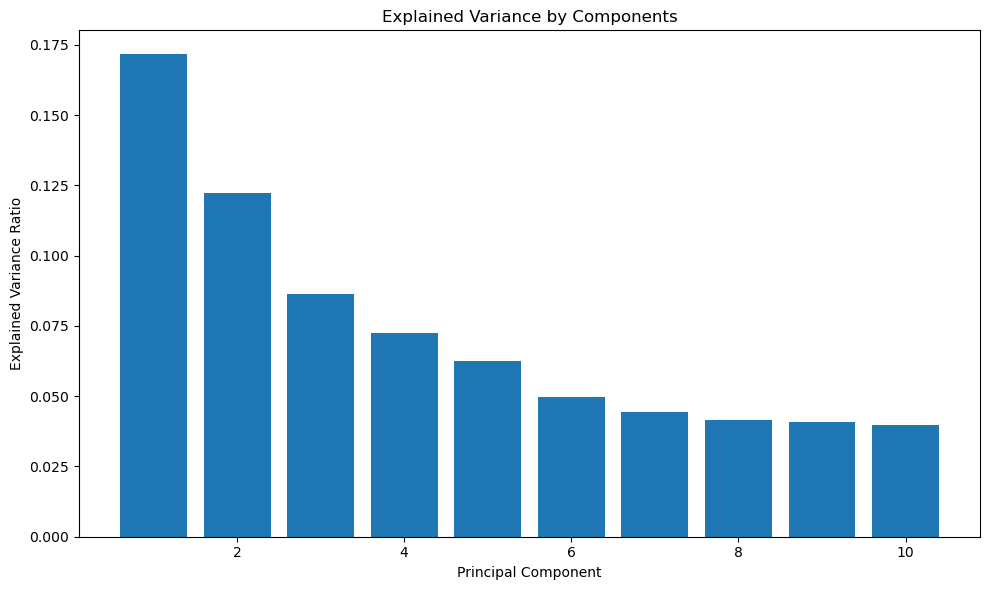

In [45]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Components')
plt.tight_layout()
plt.show()

In [46]:
# Print cumulative explained variance
print("\nCumulative explained variance:")
print(np.cumsum(pca.explained_variance_ratio_))


Cumulative explained variance:
[0.17160991 0.29407596 0.38041299 0.45277746 0.51517531 0.56498902
 0.6094467  0.65114102 0.69183173 0.73169943]


# ----- DATA AUGMENTATION FOR IMAGES -----

In [47]:
# Load MNIST dataset for image augmentation examples
(X_train_img, y_train_img), (X_test_img, y_test_img) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step 


In [48]:
# Normalize the data
X_train_img = X_train_img / 255.0
X_test_img = X_test_img / 255.0

In [49]:
# Expand dimensions for Keras (add channel dimension)
X_train_img = X_train_img.reshape(-1, 28, 28, 1)
X_test_img = X_test_img.reshape(-1, 28, 28, 1)

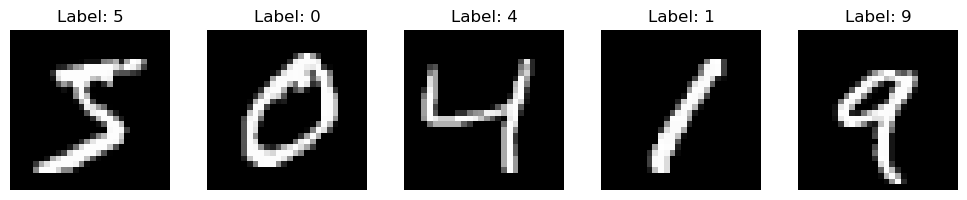

In [50]:
# Display some original images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train_img[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {y_train_img[i]}")
plt.tight_layout()
plt.show()

In [51]:
# ----- 1. BASIC IMAGE AUGMENTATION WITH KERAS -----

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    fill_mode='nearest'
)

In [52]:
# Visualize augmented images
augmented_images = []
for x_batch in datagen.flow(X_train_img[:5], batch_size=1, shuffle=False):
    augmented_images.append(x_batch[0])
    if len(augmented_images) >= 15:  # Generate 3 augmented versions of each of the 5 images
        break

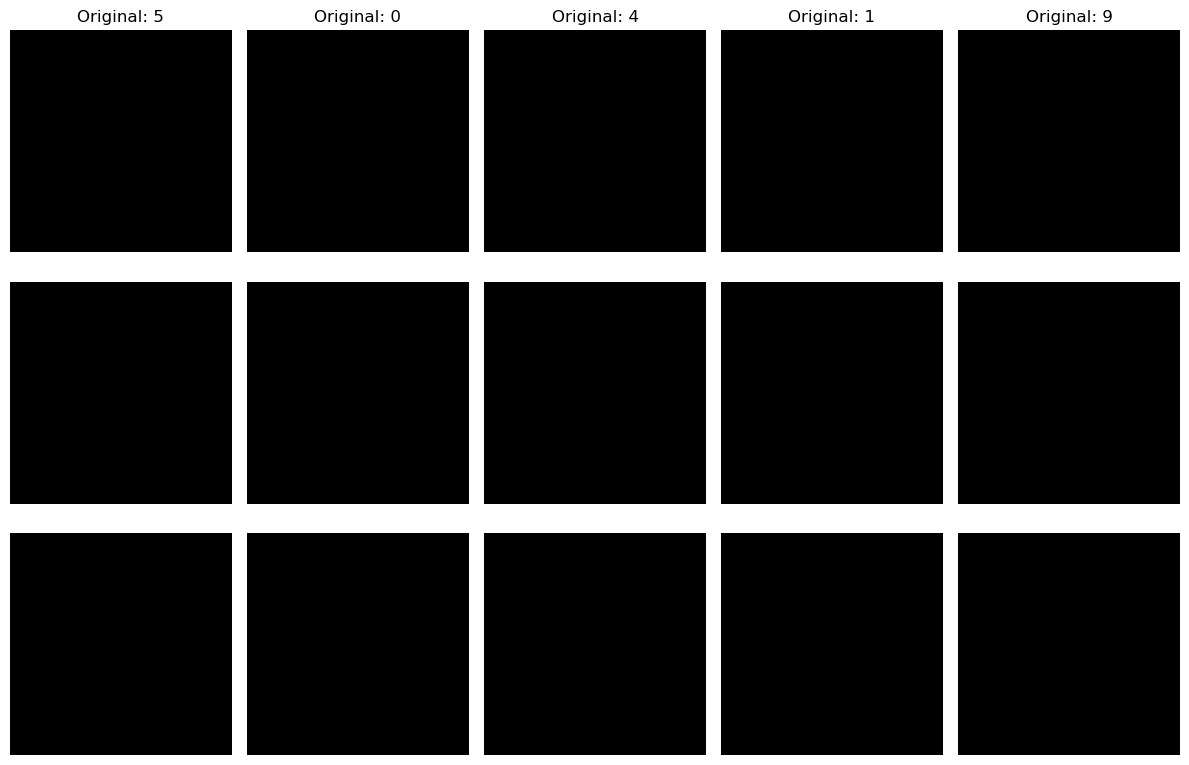

In [53]:
# Display augmented images
plt.figure(figsize=(12, 8))
for i, img in enumerate(augmented_images):
    plt.subplot(3, 5, i+1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i < 5:
        plt.title(f"Original: {y_train_img[i]}")
plt.tight_layout()
plt.show()

In [54]:
# ----- 2. AUGMENTATION WITH TF.IMAGE -----
def augment_with_tf(image):
    # Convert to float32
    image = tf.cast(image, tf.float32)

    # Random rotation
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))

    # Random brightness
    image = tf.image.random_brightness(image, max_delta=0.2)

    # Random contrast
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)

    # Ensure values are still between 0 and 1
    image = tf.clip_by_value(image, 0.0, 1.0)

    return image

In [55]:
# Apply tf.image augmentation to a few images
augmented_tf_images = []
for i in range(5):
    # Create 3 augmented versions of each image
    for _ in range(3):
        aug_img = augment_with_tf(X_train_img[i]).numpy()
        augmented_tf_images.append(aug_img)

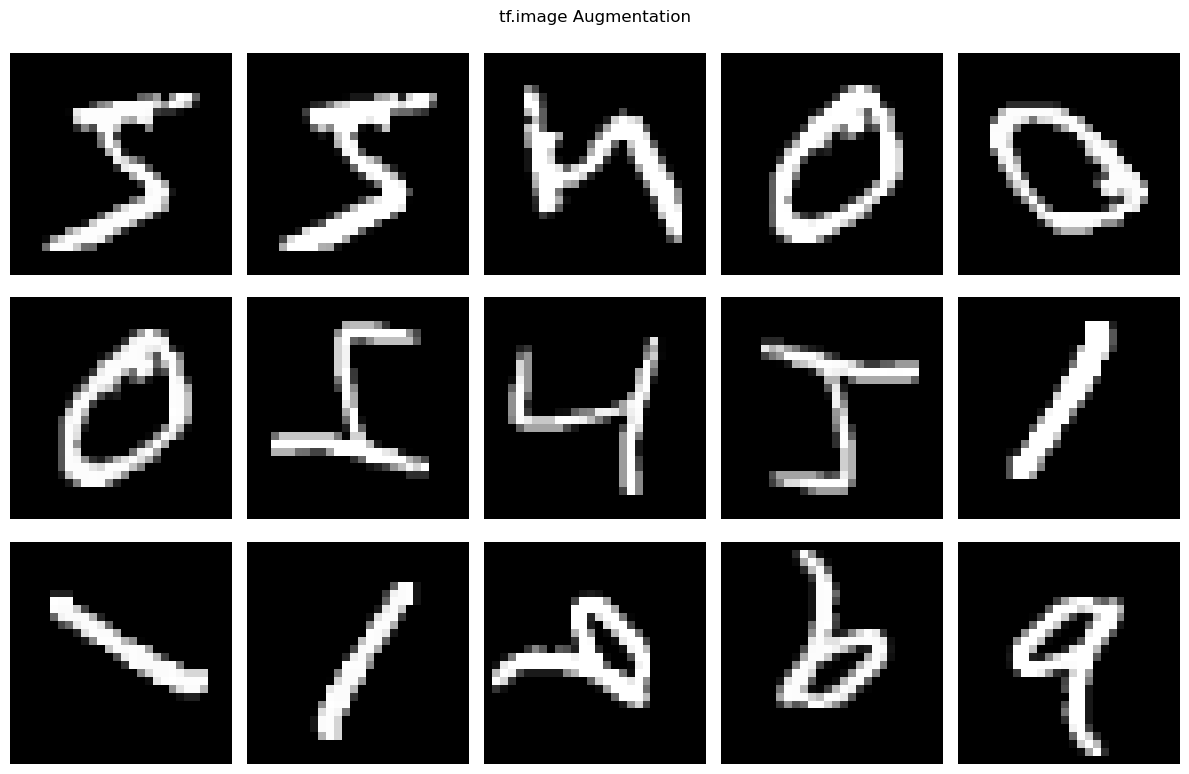

In [56]:
# Display tf.image augmented images
plt.figure(figsize=(12, 8))
for i, img in enumerate(augmented_tf_images):
    plt.subplot(3, 5, i+1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle('tf.image Augmentation')
plt.tight_layout()
plt.show()

In [57]:
# ----- 3. AUGMENTATION WITH OPENCV -----

def opencv_augment(image):
    # Convert to 0-255 range and uint8 for OpenCV
    image = (image * 255).astype(np.uint8).reshape(28, 28)

    # Choose a random augmentation
    choice = np.random.choice(['rotate', 'blur', 'zoom', 'original'])

    if choice == 'rotate':
        # Random rotation
        angle = np.random.uniform(-15, 15)
        return ndimage.rotate(image, angle, reshape=False)

    elif choice == 'blur':
        # Add blur
        return cv2.GaussianBlur(image, (3, 3), 0)

    elif choice == 'zoom':
        # Random zoom
        zoom_factor = np.random.uniform(0.8, 1.2)
        height, width = image.shape

        # Compute new dimensions
        new_height = int(height * zoom_factor)
        new_width = int(width * zoom_factor)

        if zoom_factor < 1:  # Zoom out
            # Crop the image
            y_start = (height - new_height) // 2
            x_start = (width - new_width) // 2
            cropped = image[y_start:y_start+new_height, x_start:x_start+new_width]
            # Resize back to original size
            return cv2.resize(cropped, (width, height))
        else:  # Zoom in
            # Resize
            resized = cv2.resize(image, (new_width, new_height))
            # Crop to original size
            y_start = (new_height - height) // 2
            x_start = (new_width - width) // 2
            return resized[y_start:y_start+height, x_start:x_start+width]

    else:
        # Return original
        return image

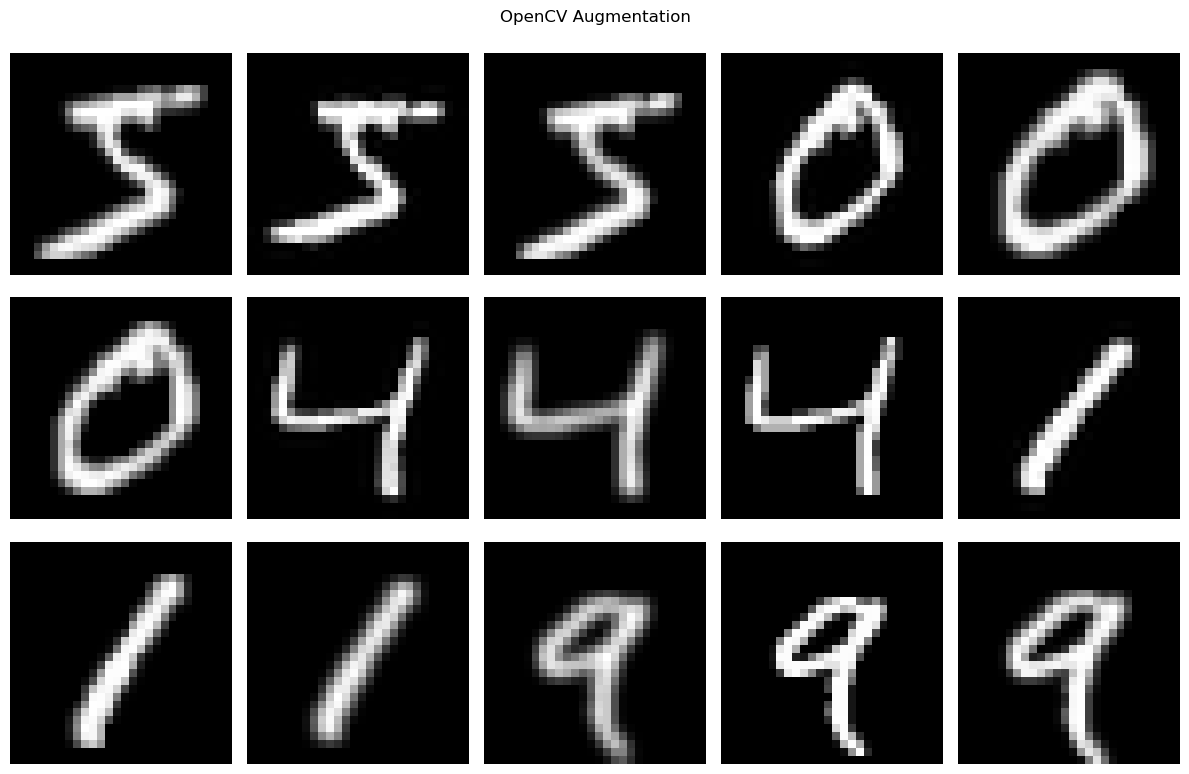

In [58]:

# Apply OpenCV augmentation
opencv_augmented = []
for i in range(5):
    # Create 3 augmented versions of each image
    for _ in range(3):
        aug_img = opencv_augment(X_train_img[i])
        # Normalize back to 0-1
        aug_img = aug_img.astype(np.float32) / 255.0
        opencv_augmented.append(aug_img)

# Display OpenCV augmented images
plt.figure(figsize=(12, 8))
for i, img in enumerate(opencv_augmented):
    plt.subplot(3, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.suptitle('OpenCV Augmentation')
plt.tight_layout()
plt.show()

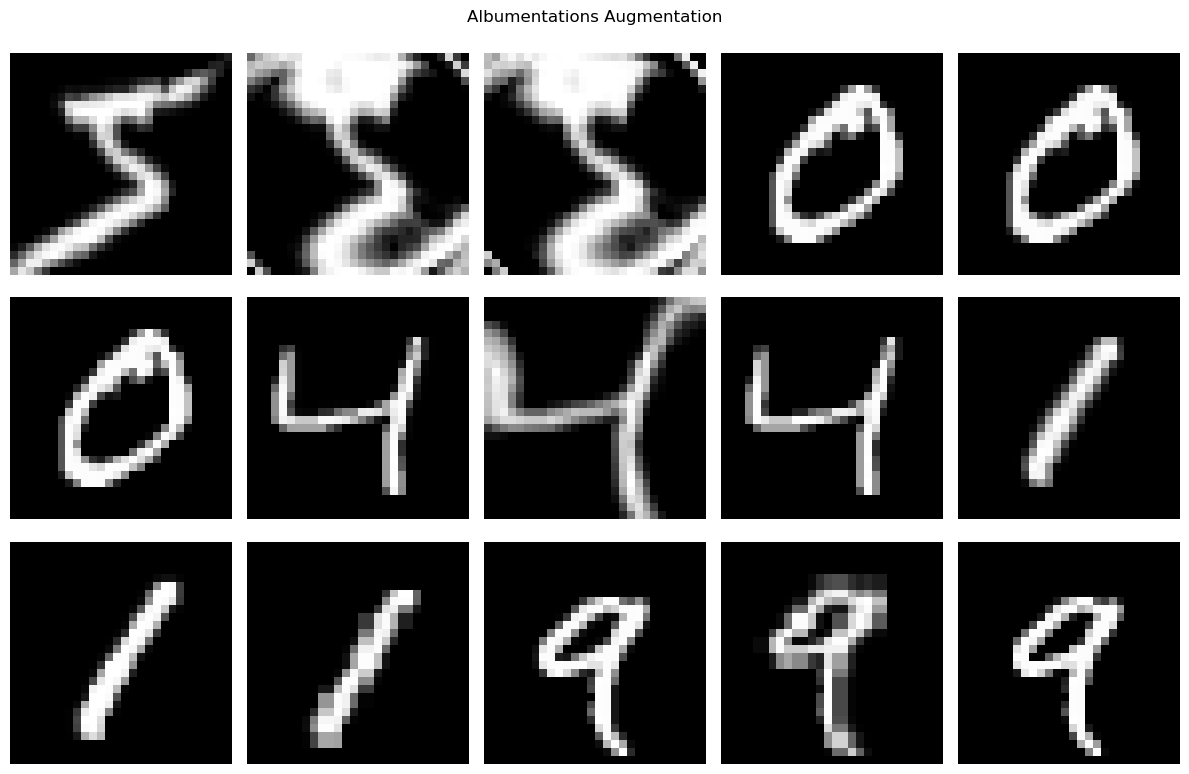

In [59]:
# ----- 4. AUGMENTATION WITH ALBUMENTATIONS -----

def apply_albumentation(image):
    # Convert to 0-255 range and uint8 for Albumentations
    image = (image * 255).astype(np.uint8).reshape(28, 28)

    # Define transformation pipeline
    transform = A.Compose([
        A.OneOf([
            A.RandomBrightnessContrast(p=0.8),
            A.RandomGamma(p=0.8),
        ], p=0.5),
        A.OneOf([
            A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.5),
            A.GridDistortion(p=0.5),
            A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=0.5),
        ], p=0.5),
    ])

    # Apply transformation
    augmented = transform(image=image)['image']

    # Normalize back to 0-1
    return augmented.astype(np.float32) / 255.0

# Apply Albumentations
albu_augmented = []
for i in range(5):
    # Create 3 augmented versions of each image
    for _ in range(3):
        aug_img = apply_albumentation(X_train_img[i])
        albu_augmented.append(aug_img)

# Display Albumentations augmented images
plt.figure(figsize=(12, 8))
for i, img in enumerate(albu_augmented):
    plt.subplot(3, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.suptitle('Albumentations Augmentation')
plt.tight_layout()
plt.show()


In [60]:
# ----- 5. TEXT DATA AUGMENTATION -----

# Sample texts
texts = [
    "This is a great product, I love it!",
    "The service was terrible and I'm disappointed.",
    "I'm not sure how I feel about this experience.",
    "The food was delicious and the staff was friendly.",
    "This movie is boring and too long."
]

In [61]:
# Simple text augmentation techniques
def swap_words(text):
    words = text.split()
    if len(words) <= 1:
        return text

    idx1, idx2 = sorted(random.sample(range(len(words)), 2))
    words[idx1], words[idx2] = words[idx2], words[idx1]
    return ' '.join(words)

def delete_random_word(text):
    words = text.split()
    if len(words) <= 1:
        return text

    idx = random.randrange(len(words))
    return ' '.join(words[:idx] + words[idx+1:])

def insert_random_word(text, word_list=["really", "very", "somewhat", "quite", "extremely"]):
    words = text.split()
    if not words:
        return text

    idx = random.randrange(len(words))
    word_to_insert = random.choice(word_list)
    return ' '.join(words[:idx] + [word_to_insert] + words[idx:])

In [62]:
# Apply text augmentation
augmented_texts = []
for text in texts:
    augmented_texts.append(("Original", text))
    augmented_texts.append(("Word Swap", swap_words(text)))
    augmented_texts.append(("Word Deletion", delete_random_word(text)))
    augmented_texts.append(("Word Insertion", insert_random_word(text)))

In [63]:
# Display original and augmented texts
print("\nText Data Augmentation Examples:")
for aug_type, text in augmented_texts:
    print(f"{aug_type}: {text}")


Text Data Augmentation Examples:
Original: This is a great product, I love it!
Word Swap: is This a great product, I love it!
Word Deletion: This is a great I love it!
Word Insertion: This is very a great product, I love it!
Original: The service was terrible and I'm disappointed.
Word Swap: The service was I'm and terrible disappointed.
Word Deletion: The service was terrible and disappointed.
Word Insertion: The extremely service was terrible and I'm disappointed.
Original: I'm not sure how I feel about this experience.
Word Swap: I'm not sure how I about feel this experience.
Word Deletion: I'm not sure how I feel about experience.
Word Insertion: I'm not sure how I feel about somewhat this experience.
Original: The food was delicious and the staff was friendly.
Word Swap: The food the delicious and was staff was friendly.
Word Deletion: The food was delicious and the staff was
Word Insertion: The food was really delicious and the staff was friendly.
Original: This movie is boring 

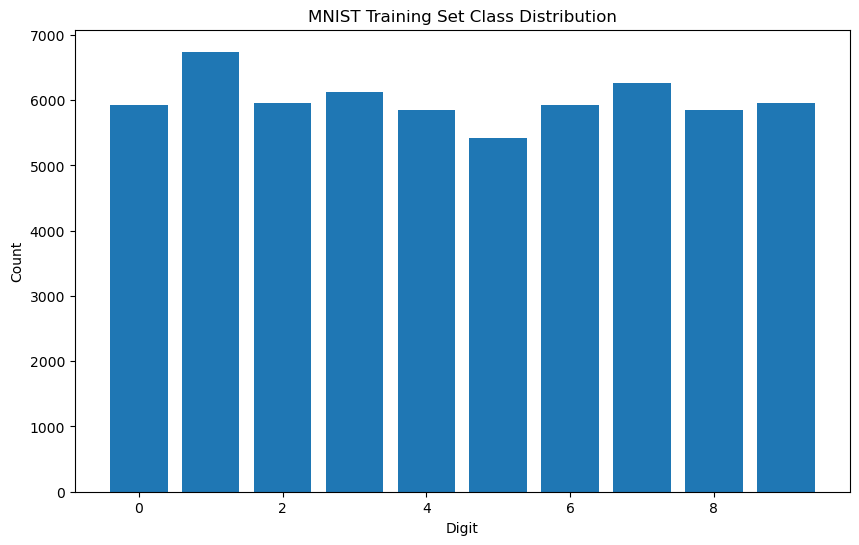

In [64]:
# ----- 6. ADVANCED APPLICATION: AUGMENT TO BALANCE CLASSES -----

# Check distribution of classes in MNIST
unique, counts = np.unique(y_train_img, return_counts=True)
class_distribution = dict(zip(unique, counts))

plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('MNIST Training Set Class Distribution')
plt.show()

In [65]:

def augment_minority_class(X, y, target_class, num_samples):
    # Find samples of the target class
    class_indices = np.where(y == target_class)[0]
    X_class = X[class_indices]

    # If we already have enough samples, no need to augment
    if len(X_class) >= num_samples:
        return X, y

    # Number of augmentations needed
    num_augmentations = num_samples - len(X_class)

    # Create augmentation generator
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Generate augmented images
    augmented_images = []
    augmented_labels = []

    for x_batch in datagen.flow(X_class, batch_size=1, shuffle=True):
        augmented_images.append(x_batch[0])
        augmented_labels.append(target_class)
        if len(augmented_images) >= num_augmentations:
            break

    # Convert to numpy arrays
    augmented_images = np.array(augmented_images)
    augmented_labels = np.array(augmented_labels)

    # Combine original and augmented data
    X_balanced = np.vstack([X, augmented_images])
    y_balanced = np.hstack([y, augmented_labels])

    return X_balanced, y_balanced

In [66]:
# Demonstrate balancing a subset of MNIST
# For demonstration, let's use just 100 samples per class initially
X_sample = []
y_sample = []

for digit in range(10):
    indices = np.where(y_train_img == digit)[0][:100]  # Take 100 samples of each digit
    X_sample.extend(X_train_img[indices])
    y_sample.extend(y_train_img[indices])

X_sample = np.array(X_sample)
y_sample = np.array(y_sample)

In [67]:
# Print initial distribution
unique, counts = np.unique(y_sample, return_counts=True)
print("\nInitial distribution:")
print(dict(zip(unique, counts)))


Initial distribution:
{np.uint8(0): np.int64(100), np.uint8(1): np.int64(100), np.uint8(2): np.int64(100), np.uint8(3): np.int64(100), np.uint8(4): np.int64(100), np.uint8(5): np.int64(100), np.uint8(6): np.int64(100), np.uint8(7): np.int64(100), np.uint8(8): np.int64(100), np.uint8(9): np.int64(100)}


In [68]:
# Let's artificially create an imbalance by removing some '8' samples
eight_indices = np.where(y_sample == 8)[0]
remove_indices = eight_indices[:80]  # Remove 80 samples of digit 8
mask = np.ones(len(y_sample), dtype=bool)
mask[remove_indices] = False

X_imbalanced = X_sample[mask]
y_imbalanced = y_sample[mask]

In [69]:
# Print imbalanced distribution
unique, counts = np.unique(y_imbalanced, return_counts=True)
print("\nImbalanced distribution:")
print(dict(zip(unique, counts)))


Imbalanced distribution:
{np.uint8(0): np.int64(100), np.uint8(1): np.int64(100), np.uint8(2): np.int64(100), np.uint8(3): np.int64(100), np.uint8(4): np.int64(100), np.uint8(5): np.int64(100), np.uint8(6): np.int64(100), np.uint8(7): np.int64(100), np.uint8(8): np.int64(20), np.uint8(9): np.int64(100)}


In [70]:
# Balance the dataset using augmentation
X_balanced, y_balanced = augment_minority_class(X_imbalanced, y_imbalanced, 8, 100)

# Print balanced distribution
unique, counts = np.unique(y_balanced, return_counts=True)
print("\nBalanced distribution after augmentation:")
print(dict(zip(unique, counts)))


Balanced distribution after augmentation:
{np.int64(0): np.int64(100), np.int64(1): np.int64(100), np.int64(2): np.int64(100), np.int64(3): np.int64(100), np.int64(4): np.int64(100), np.int64(5): np.int64(100), np.int64(6): np.int64(100), np.int64(7): np.int64(100), np.int64(8): np.int64(100), np.int64(9): np.int64(100)}


In [71]:
# ----- 7. DEMONSTRATING THE EFFECT OF AUGMENTATION ON MODEL PERFORMANCE -----

# Create a simple CNN model for MNIST
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [72]:
# Train model on imbalanced data
model_imbalanced = create_model()
history_imbalanced = model_imbalanced.fit(X_imbalanced, y_imbalanced, epochs=5,
                                           validation_split=0.2, verbose=0)


In [73]:
# Train model on balanced data
model_balanced = create_model()
history_balanced = model_balanced.fit(X_balanced, y_balanced, epochs=5,
                                       validation_split=0.2, verbose=0)

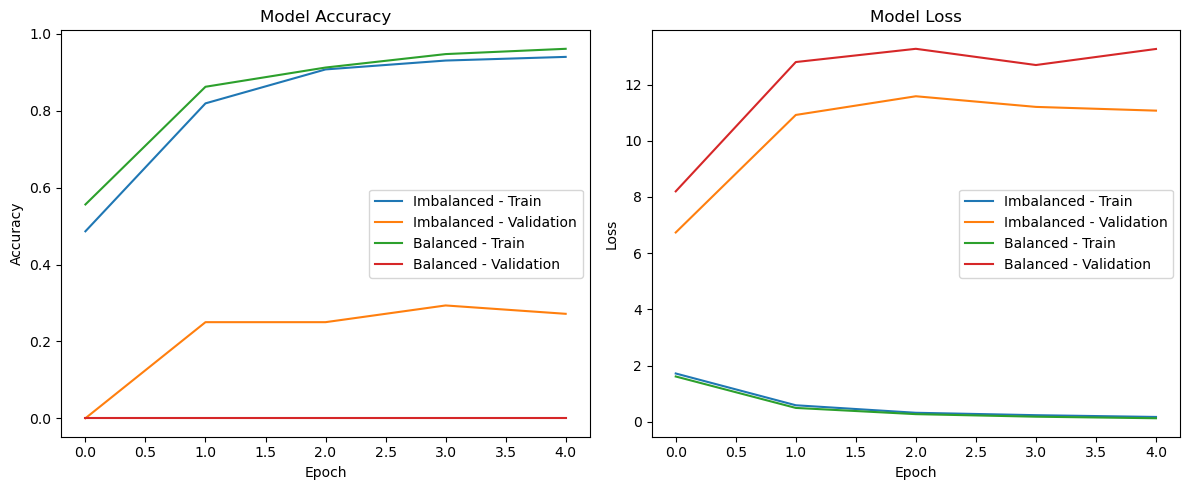

In [74]:
# Compare performance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_imbalanced.history['accuracy'], label='Imbalanced - Train')
plt.plot(history_imbalanced.history['val_accuracy'], label='Imbalanced - Validation')
plt.plot(history_balanced.history['accuracy'], label='Balanced - Train')
plt.plot(history_balanced.history['val_accuracy'], label='Balanced - Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_imbalanced.history['loss'], label='Imbalanced - Train')
plt.plot(history_imbalanced.history['val_loss'], label='Imbalanced - Validation')
plt.plot(history_balanced.history['loss'], label='Balanced - Train')
plt.plot(history_balanced.history['val_loss'], label='Balanced - Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Excercise

In [1]:
# 1. Setup and Data Loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# TODO: Load the Titanic dataset into `df` using pd.read_csv
# Hint: URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')  # TODO

# TODO: Display first 5 rows and the dataset shape
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
# TODO: Print missing value counts per column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# TODO: Fill missing 'Age' with its median
df['Age'].fillna(df['Age'].median(), inplace=True)
# TODO: Fill missing 'Embarked' with its mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# TODO: Replace missing 'Cabin' entries with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)
df.isnull().sum()

C:\Users\test\AppData\Local\Temp\ipykernel_16460\1548776596.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\test\AppData\Local\Temp\ipykernel_16460\1548776596.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
# 2. Missing Value Imputation
# 3.1 Extract Title from Name
# TODO: Create df['Title'] by extracting the substring before '.' in Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [7]:
# 3.2 Group rare titles into 'Rare' and standardize variants
rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
# TODO: Replace rare and variant titles accordingly
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss')

In [8]:
# 3.3 Family Size and IsAlone
# TODO: df['FamilySize'] = SibSp + Parch + 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [9]:
# TODO: df['IsAlone'] = 1 where FamilySize == 1, else 0
df['IsAlone'] = (df['FamilySize']==1).astype(int)

In [10]:
# 3.4 Fare Per Person
# TODO: df['FarePerPerson'] = Fare / FamilySize
df['FarePerPerson'] = df['Fare'] / df['FamilySize']
df['FarePerPerson']

0       3.62500
1      35.64165
2       7.92500
3      26.55000
4       8.05000
         ...   
886    13.00000
887    30.00000
888     5.86250
889    30.00000
890     7.75000
Name: FarePerPerson, Length: 891, dtype: float64

In [11]:
# 3.5 Age and Fare Binning
# TODO: Create AgeBin categories: Child (0–12), Teenager (13–18), Adult (19–65), Elderly (>65)
df['AgeBin'] = pd.cut(df['Age'], bins= [0,12,18,65,100], labels = ['Child','Teenager','Adult','Elderly'])

In [12]:
# TODO: Create FareBin quantiles: Low, Medium, High, Very High
df['FareBin'] = pd.qcut(df['Fare'], 4, labels = ['Low', 'Medium', 'High', 'Very High'])

In [13]:
# 3.6 Deck from Cabin
# TODO: df['Deck'] = first letter of Cabin; replace 'Unknown'→'U' and rare letters→'Other'
# Extract first letter (Deck) or 'U' for Unknown
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')
# Replace rare decks with 'Other'
common_decks = ['A','B','C','D','E','F','G','U']
df['Deck'] = df['Deck'].apply(lambda x: x if x in common_decks else 'Other')

In [ ]:
# 3. Feature Engineering

# 3.1 Extract Title from Name
# TODO: Create df['Title'] by extracting the substring before '.' in Name

# 3.2 Group rare titles into 'Rare' and standardize variants
rare_titles = [...]
# TODO: Replace rare and variant titles accordingly

# 3.3 Family Size and IsAlone
# TODO: df['FamilySize'] = SibSp + Parch + 1
# TODO: df['IsAlone'] = 1 where FamilySize == 1, else 0

# 3.4 Fare Per Person
# TODO: df['FarePerPerson'] = Fare / FamilySize

# 3.5 Age and Fare Binning
# TODO: Create AgeBin categories: Child (0–12), Teenager (13–18), Adult (19–65), Elderly (>65)
# TODO: Create FareBin quantiles: Low, Medium, High, Very High

# 3.6 Deck from Cabin
# TODO: df['Deck'] = first letter of Cabin; replace 'Unknown'→'U' and rare letters→'Other'


In [14]:
# 4. Encoding and Scaling

# 4.1 One‑hot encode selected categorical columns using pd.get_dummies :contentReference[oaicite:11]{index=11}
categorical = ['Pclass','Sex','Embarked','Title','AgeBin','FareBin','Deck']
# TODO: df_encoded = pd.get_dummies(df[categorical], drop_first=True)
df_encoded = pd.get_dummies(df[categorical], drop_first=True)


In [15]:
# 4.2 Combine with numerical features
numerical = ['Age','SibSp','Parch','Fare','FamilySize','IsAlone','FarePerPerson']
# TODO: X = pd.concat([...], axis=1)
X = pd.concat([df[numerical], df_encoded], axis=1)
# TODO: y = df['Survived']
y = df['Survived']

In [16]:
# 4.3 Feature scaling: fit three different scalers and transform X
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# TODO: scaler_std = StandardScaler()       # :contentReference[oaicite:12]{index=12}
# TODO: scaler_mm  = MinMaxScaler()
# TODO: scaler_rbv = RobustScaler()
# TODO: X_std = scaler_std.fit_transform(X)
# TODO: X_mm  = scaler_mm.fit_transform(X)
# TODO: X_rb  = scaler_rbv.fit_transform(X)
# Initialize scalers
scaler_std = StandardScaler()
scaler_mm  = MinMaxScaler()
scaler_rbv = RobustScaler()
# Fit and transform
X_std = scaler_std.fit_transform(X)
X_mm  = scaler_mm.fit_transform(X)
X_rb  = scaler_rbv.fit_transform(X)

In [17]:
# 5. Feature Selection & Modeling

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# TODO: Use SelectKBest(f_classif, k=15) to pick top features :contentReference[oaicite:13]{index=13}
selector = SelectKBest(score_func=f_classif, k=15)  # TODO
# TODO: X_sel = selector.fit_transform(X_std, y)
X_sel = selector.fit_transform(X_std, y)
# TODO: top_feats = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_}).nlargest(15,'Score')
top_feats = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).nlargest(15, 'Score')
print(top_feats)

              Feature       Score
12           Title_Mr  383.945495
8            Sex_male  372.405724
13          Title_Mrs  117.749079
7              Pclass  115.031272
11         Title_Miss  112.860827
28             Deck_U   99.253142
3                Fare   63.030764
20  FareBin_Very High   51.329338
6       FarePerPerson   45.910184
5             IsAlone   38.353651
21             Deck_B   28.117228
23             Deck_D   20.663186
10         Embarked_S   20.374460
24             Deck_E   19.179221
22             Deck_C   11.841661


In [19]:
# TODO: Split into train/test (25% test), train RandomForestClassifier, and print:
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.25, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#       - Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred)) 
#       - Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8071748878923767

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       134
           1       0.74      0.80      0.77        89

    accuracy                           0.81       223
   macro avg       0.80      0.81      0.80       223
weighted avg       0.81      0.81      0.81       223



['Age' 'Fare' 'Age^2' 'Age Fare' 'Fare^2']


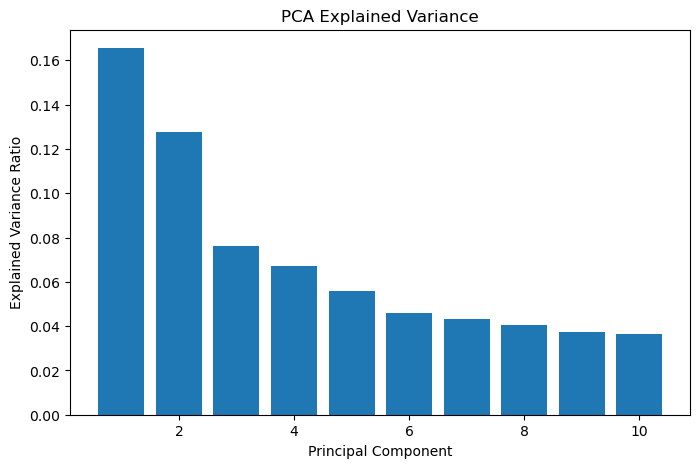

Cumulative Variance Explained: [0.16553016 0.29337853 0.36974248 0.43678413 0.4926733  0.53840627
 0.58163574 0.62216785 0.65960578 0.69587883]


In [20]:
# 6. Advanced Feature Engineering

# 6.1 Polynomial Features using sklearn.preprocessing.PolynomialFeatures :contentReference[oaicite:14]{index=14}
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df[['Age','Fare']].fillna(0))
print(poly.get_feature_names_out(['Age','Fare']))

# 6.2 PCA for dimensionality reduction :contentReference[oaicite:15]{index=15}
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_std)

plt.figure(figsize=(8,5))
plt.bar(range(1, 11), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()

print("Cumulative Variance Explained:", np.cumsum(pca.explained_variance_ratio_))

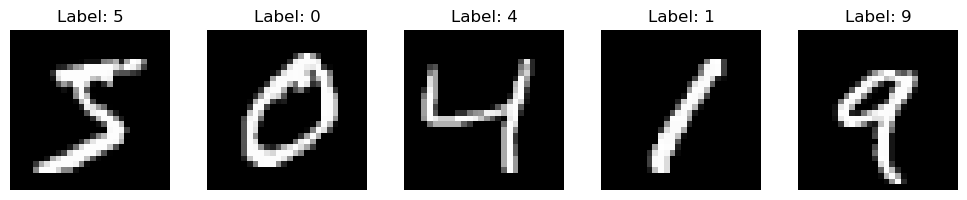

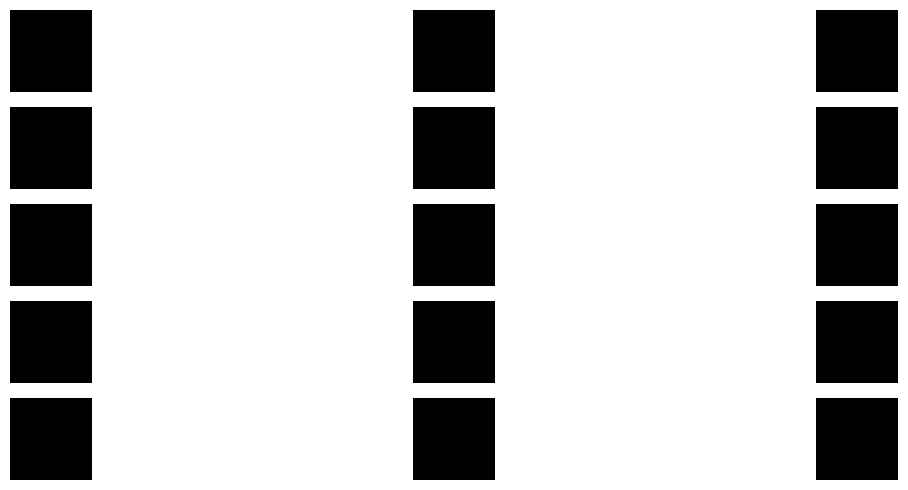

In [21]:
# 7. Image Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# TODO: Load MNIST, normalize, and reshape to (28,28,1)
(x_train, y_train), (_, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

# TODO: Display 5 sample images with true labels
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 7.1 Keras ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1,
                             shear_range=0.1,
                             brightness_range=[0.5,1.5],
                             horizontal_flip=True,
                             fill_mode='nearest')

# TODO: Generate and plot 3 augmentations per sample for first 5 images
plt.figure(figsize=(15,5))
for i in range(5):
    sample = x_train[i]
    sample = sample.reshape((1, 28, 28, 1))
    aug_iter = datagen.flow(sample, batch_size=1)
    for j in range(3):
        aug_image = next(aug_iter)[0].squeeze()
        plt.subplot(5, 3, i*3 + j + 1)
        plt.imshow(aug_image, cmap='gray')
        plt.axis('off')
plt.tight_layout()
plt.show()

# 7.2 tf.image augmentations
import tensorflow as tf

def tf_augment(image):
    image = tf.image.rot90(image)
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    return image

# 7.3 OpenCV augmentations
import cv2
from scipy import ndimage

def opencv_augment(image):
    op = np.random.choice(['rotate', 'blur', 'zoom'])
    image = image.squeeze()
    if op == 'rotate':
        angle = np.random.uniform(-15, 15)
        return ndimage.rotate(image, angle, reshape=False)
    elif op == 'blur':
        return cv2.GaussianBlur(image, (3, 3), 0)
    elif op == 'zoom':
        zoomed = cv2.resize(image, None, fx=1.2, fy=1.2)
        center = zoomed.shape[0] // 2
        cropped = zoomed[center-14:center+14, center-14:center+14]
        return cv2.resize(cropped, (28, 28))
    return image

# 7.4 Albumentations pipeline
import albumentations as A

albumentations_pipeline = A.Compose([
    A.RandomBrightnessContrast(p=0.5),
    A.ElasticTransform(p=0.5),
    A.GridDistortion(p=0.5),
    A.OpticalDistortion(p=0.5)
])

In [22]:
# 8. Text Data Augmentation

import random

# Sample sentences provided
texts = [
    "The quick brown fox jumps over the lazy dog",
    "Data science is an interdisciplinary field",
    "Machine learning models require lots of data",
    "Natural language processing is fun and challenging",
    "Deep learning enables powerful AI systems"
]

# TODO: Implement swap_words(text), delete_random_word(text), insert_random_word(text)

def swap_words(text):
    words = text.split()
    if len(words) < 2:
        return text
    i, j = random.sample(range(len(words)), 2)
    words[i], words[j] = words[j], words[i]
    return ' '.join(words)

def delete_random_word(text):
    words = text.split()
    if len(words) <= 1:
        return text
    idx = random.randint(0, len(words) - 1)
    del words[idx]
    return ' '.join(words)

def insert_random_word(text):
    words = text.split()
    if not words:
        return text
    random_word = random.choice(words)
    idx = random.randint(0, len(words))
    words.insert(idx, random_word)
    return ' '.join(words)

# TODO: For each original text, print the 3 augmented variants
for text in texts:
    print("Original:        ", text)
    print("Swap Words:      ", swap_words(text))
    print("Delete Word:     ", delete_random_word(text))
    print("Insert Word:     ", insert_random_word(text))
    print()

Original:         The quick brown fox jumps over the lazy dog
Swap Words:       The brown quick fox jumps over the lazy dog
Delete Word:      The quick brown fox over the lazy dog
Insert Word:      The quick brown fox over jumps over the lazy dog

Original:         Data science is an interdisciplinary field
Swap Words:       interdisciplinary science is an Data field
Delete Word:      science is an interdisciplinary field
Insert Word:      Data science field is an interdisciplinary field

Original:         Machine learning models require lots of data
Swap Words:       of learning models require lots Machine data
Delete Word:      learning models require lots of data
Insert Word:      Machine learning models Machine require lots of data

Original:         Natural language processing is fun and challenging
Swap Words:       Natural language processing is fun challenging and
Delete Word:      Natural language processing is fun and
Insert Word:      Natural language processing is language 

In [23]:
# 9. Class Balancing via Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Simulate imbalanced data using MNIST as example
from tensorflow.keras.datasets import mnist
(X_train_img, y_train_img), (_, _) = mnist.load_data()
X_train_img = X_train_img / 255.0
X_train_img = np.expand_dims(X_train_img, axis=-1)

# Reduce samples of class '1' to simulate imbalance
minority_class = 1
idx_majority = np.where(y_train_img != minority_class)[0]
idx_minority = np.where(y_train_img == minority_class)[0][:500]  # keep only 500 samples

X_train_img = np.concatenate([X_train_img[idx_majority], X_train_img[idx_minority]])
y_train_img = np.concatenate([y_train_img[idx_majority], y_train_img[idx_minority]])

# TODO: Compute class distribution of y_train_img
counter = Counter(y_train_img)
print("Class Distribution Before Augmentation:", counter)

# TODO: Write augment_minority_class(X, y, target_class, num_samples)
def augment_minority_class(X, y, target_class, num_samples):
    idx = np.where(y == target_class)[0]
    X_minority = X[idx]
    y_minority = y[idx]

    datagen = ImageDataGenerator(rotation_range=10,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 zoom_range=0.1,
                                 shear_range=0.1,
                                 fill_mode='nearest')

    aug_iter = datagen.flow(X_minority, y_minority, batch_size=1)
    X_aug = []
    y_aug = []
    for _ in range(num_samples):
        x_batch, y_batch = next(aug_iter)
        X_aug.append(x_batch[0])
        y_aug.append(y_batch[0])
    
    X_balanced = np.concatenate([X, np.array(X_aug)])
    y_balanced = np.concatenate([y, np.array(y_aug)])
    return X_balanced, y_balanced

# Example: Balance minority class '1' by adding 1000 samples
X_balanced, y_balanced = augment_minority_class(X_train_img, y_train_img, target_class=1, num_samples=1000)

# Verify new distribution
print("Class Distribution After Augmentation:", Counter(y_balanced))

Class Distribution Before Augmentation: Counter({np.uint8(7): 6265, np.uint8(3): 6131, np.uint8(2): 5958, np.uint8(9): 5949, np.uint8(0): 5923, np.uint8(6): 5918, np.uint8(8): 5851, np.uint8(4): 5842, np.uint8(5): 5421, np.uint8(1): 500})
Class Distribution After Augmentation: Counter({np.uint8(7): 6265, np.uint8(3): 6131, np.uint8(2): 5958, np.uint8(9): 5949, np.uint8(0): 5923, np.uint8(6): 5918, np.uint8(8): 5851, np.uint8(4): 5842, np.uint8(5): 5421, np.uint8(1): 1500})


C:\Users\test\miniconda3\envs\tf-env1\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


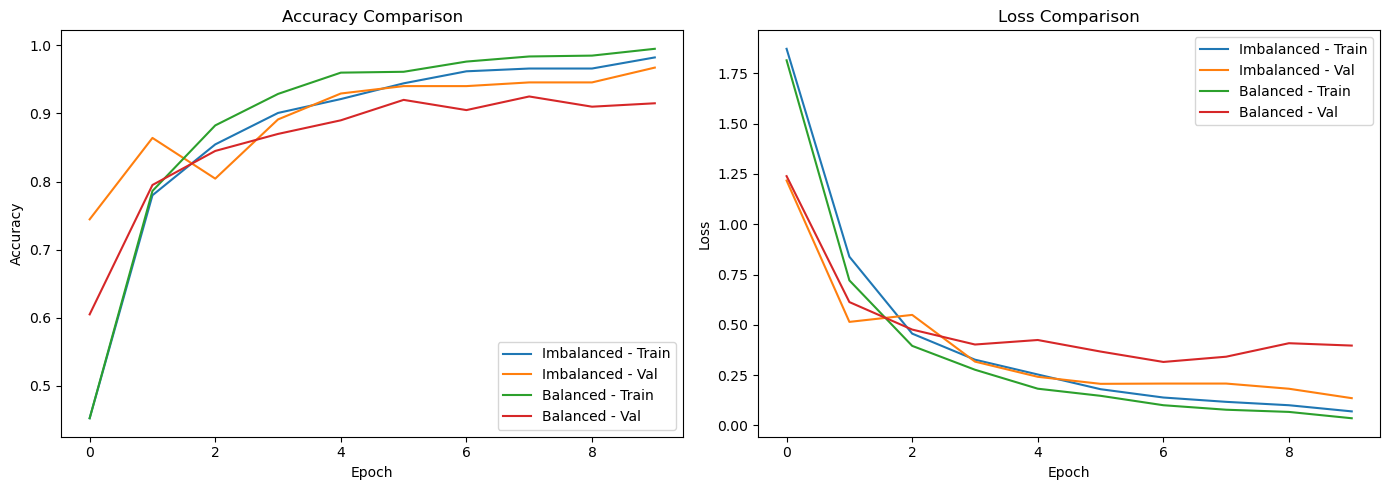

In [24]:
# 10. Effect of Augmentation on Model Performance

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from collections import Counter

# Reload MNIST
(X_train_img, y_train_img), (_, _) = tf.keras.datasets.mnist.load_data()
X_train_img = X_train_img / 255.0
X_train_img = np.expand_dims(X_train_img, -1)

# TODO: Define create_model() as simple CNN
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# TODO: Train on imbalanced subset (e.g. first 100 per class minus some for class '8')
subset_X = []
subset_y = []
for digit in range(10):
    idx = np.where(y_train_img == digit)[0]
    if digit == 8:
        idx = idx[:20]  # fewer samples for class '8'
    else:
        idx = idx[:100]
    subset_X.append(X_train_img[idx])
    subset_y.append(y_train_img[idx])

X_imbal = np.concatenate(subset_X)
y_imbal = np.concatenate(subset_y)
X_imbal, y_imbal = shuffle(X_imbal, y_imbal)

model_imbal = create_model()
history_imbal = model_imbal.fit(X_imbal, y_imbal, epochs=10, validation_split=0.2, verbose=0)

# TODO: Train on balanced data after augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_class(X, y, class_id, desired_count):
    idx = np.where(y == class_id)[0]
    X_class = X[idx]
    y_class = y[idx]

    datagen = ImageDataGenerator(rotation_range=10,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 zoom_range=0.1,
                                 shear_range=0.1,
                                 fill_mode='nearest')

    aug_iter = datagen.flow(X_class, y_class, batch_size=1)
    X_aug, y_aug = [], []
    while len(X_aug) < desired_count - len(X_class):
        x_batch, y_batch = next(aug_iter)
        X_aug.append(x_batch[0])
        y_aug.append(y_batch[0])

    X_bal = np.concatenate([X, np.array(X_aug)])
    y_bal = np.concatenate([y, np.array(y_aug)])
    return X_bal, y_bal

X_bal, y_bal = augment_class(X_imbal, y_imbal, class_id=8, desired_count=100)
X_bal, y_bal = shuffle(X_bal, y_bal)

model_bal = create_model()
history_bal = model_bal.fit(X_bal, y_bal, epochs=10, validation_split=0.2, verbose=0)

# TODO: Plot training/validation accuracy and loss side by side
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_imbal.history['accuracy'], label='Imbalanced - Train')
plt.plot(history_imbal.history['val_accuracy'], label='Imbalanced - Val')
plt.plot(history_bal.history['accuracy'], label='Balanced - Train')
plt.plot(history_bal.history['val_accuracy'], label='Balanced - Val')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_imbal.history['loss'], label='Imbalanced - Train')
plt.plot(history_imbal.history['val_loss'], label='Imbalanced - Val')
plt.plot(history_bal.history['loss'], label='Balanced - Train')
plt.plot(history_bal.history['val_loss'], label='Balanced - Val')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Experiment: feel free to tweak parameters (e.g., k in SelectKBest, PCA components, augmentation ranges) to see their impact.**